In [27]:
%pip install xgboost matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("cleaned_breast_cancer_data.csv")

df.head()

,Age,differentiate,Tumor Size,Survival Months,Node Positive Ratio,T Stage Encoded,M Stage Encoded,N Stage Encoded,Estrogen Status Encoded,Progesterone Status Encoded,Survival More Than 6 Years
0,68,3,4,60,0.041667,0.0,1,0.0,1,1,0
1,50,2,35,62,0.357143,1.0,1,1.0,1,1,0
2,58,2,63,75,0.500000,2.0,1,2.0,1,1,1
3,58,3,18,84,0.500000,0.0,1,0.0,1,1,1
4,47,3,41,50,0.333333,1.0,1,0.0,1,1,0


In [30]:
X = df.drop(columns=["Survival More Than 6 Years", "Survival Months"])
y = df["Survival More Than 6 Years"]

[0.11521043 0.10511006 0.11966519 0.11679552 0.07661554 0.08661457
 0.14428613 0.11148949 0.12421308]


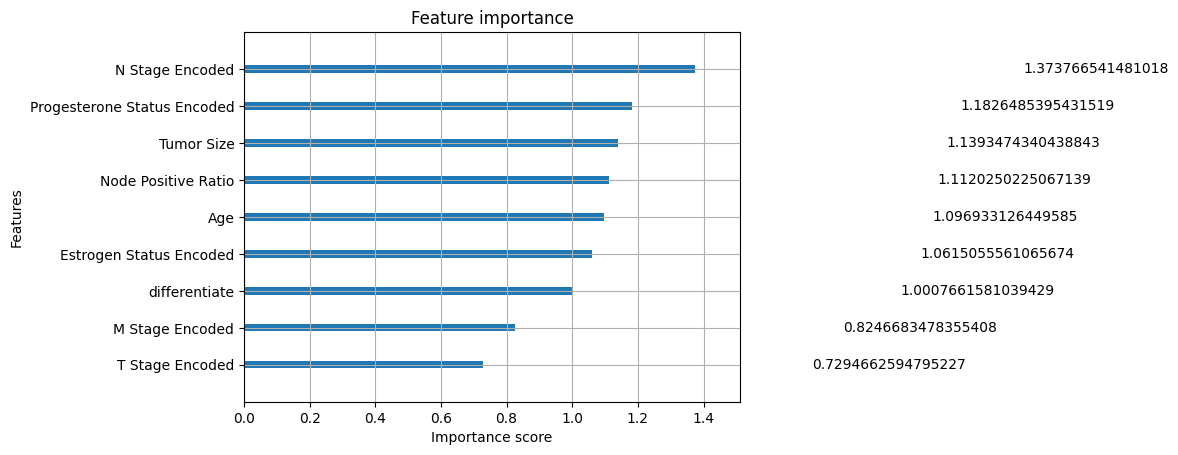

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

xgb.plot_importance(model, importance_type="gain")
plt.tight_layout()
plt.show()

In [ ]:
importance_dict = model.get_booster().get_score(importance_type="gain")
keys = list(importance_dict.keys())
values = list(importance_dict.values())

importance_df = pd.DataFrame(
    {
        "feature": list(importance_dict.keys()),
        "importance": list(importance_dict.values()),
    }
).sort_values(by="importance", ascending=False)

print(importance_df)

                       feature  importance
6              N Stage Encoded    1.373767
8  Progesterone Status Encoded    1.182649
2                   Tumor Size    1.139347
3          Node Positive Ratio    1.112025
0                          Age    1.096933
7      Estrogen Status Encoded    1.061506
1                differentiate    1.000766
5              M Stage Encoded    0.824668
4              T Stage Encoded    0.729466


In [33]:
import numpy as np
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

thresholds = sort(model.feature_importances_)

for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    selected_features = X_train.columns[selection.get_support()]

    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)

    print(
        "Thresh=%.3f, n=%d, Accuracy: %.2f%%"
        % (thresh, select_X_train.shape[1], accuracy * 100.0)
    )
    print("Selected Features:", list(selected_features))
    print("-" * 60)


Thresh=0.077, n=9, Accuracy: 51.32%
Selected Features: ['Age', 'differentiate', 'Tumor Size', 'Node Positive Ratio', 'T Stage Encoded', 'M Stage Encoded', 'N Stage Encoded', 'Estrogen Status Encoded', 'Progesterone Status Encoded']
------------------------------------------------------------
Thresh=0.087, n=8, Accuracy: 50.91%
Selected Features: ['Age', 'differentiate', 'Tumor Size', 'Node Positive Ratio', 'M Stage Encoded', 'N Stage Encoded', 'Estrogen Status Encoded', 'Progesterone Status Encoded']
------------------------------------------------------------
Thresh=0.105, n=7, Accuracy: 51.90%
Selected Features: ['Age', 'differentiate', 'Tumor Size', 'Node Positive Ratio', 'N Stage Encoded', 'Estrogen Status Encoded', 'Progesterone Status Encoded']
------------------------------------------------------------
Thresh=0.111, n=6, Accuracy: 52.98%
Selected Features: ['Age', 'Tumor Size', 'Node Positive Ratio', 'N Stage Encoded', 'Estrogen Status Encoded', 'Progesterone Status Encoded']
-